# TITANIC

## Introduction
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![img](titanic.jpeg)

## Motivation
Our goal is to make a prediction of who survived or not in the Titanic Disaster. To accomplish our objective we will build a machine learning model using Random Forests, trying to obtain the highest prediction accuracy possible.

## Import Libraries
First of all we need to import the libraries that we need:

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

Our dataset has 12 columns representing different features. We will show you the first five rows of the dataset and take a glimpse about how our dataset looks like:

In [3]:
X = pd.read_csv("https://raw.githubusercontent.com/deister/AI/master/resources/titanic.csv")
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our dataset has the following features:

*  **PassengerId:** Id of every passenger.
*  **Survived:** Survived (1) or died (0).
*  **Pclass:** Passenger’s ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
*  **Name:** Name of passenger.
*  **Sex:** Gender of passenger.
*  **Age:** Age of passenger.
*  **SibSp:** Number of siblings/spouses aboard.
*  **Parch:** Number of parents/children aboard.
*  **Ticket:** Passenger’s ticket number.
*  **Fare:** Fare payed by the passenger.
*  **Cabin:** The cabin of passenger.
*  **Embarked:** The embarked category.

## Preprocess the Data


To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

### Split the Data
We need to split our data into a Train Set and a Test Set. In our case the Train Set is called 'X' and it will contain all the data from the table and the Test Set, which is called 'y', will contain all the data without our predefined Target Column (**Survived**).

In [87]:
X = pd.read_csv("titanic.csv")
y = X.pop("Survived")

To see if the are some missing values in our numeric variables we use the 'describe' function:

In [88]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Fill the Missing Values
On the table above the column 'Age' disposes of some missing values. To solve this problem we will fill the missing gaps using the median of the values of the column.

In [89]:
X["Age"].fillna(X.Age.mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Once we have applied the median function we can observe that the gaps that were in the 'Age' column are now filled. 


### Numeric Variables
For a better treatment with data we are in obligation to know which are the numeric variables deposited in our dataset.

In [90]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


Our numeric variables are: 'PassengerId', 'Pclass', 'Age', 'Sibsp', 'Parch' and 'Fare'.

## Training Model

We will start off with a Random Forest Regressor. The Random Forest Regressor examines one variable at a time and splits it into two or more branches based on the result of that value. The attributes that we have applied to our model are n_estimators which declares the number of trees that we want in the forest. 'Out of bag Error' ('oob_score') will give us the mean prediction error on each training sample, and finally, the random_state that will expose the number of methods for generating random numbers drawn from a variety of probability distributions. 

In [91]:
model = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 42)

We will only work with the numeric variables since we haven't applied the one-hot encoded function to our categorical variables.

In [92]:
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

Once we have seen the characteristics of our model, we print out the resulting oob_score and ROC AUC (Compute Area Under the Receiver Operating Characteristic Curve) from prediction scores.

In [93]:
model.oob_score_

0.1361695005913669

In [94]:
y_oob = model.oob_prediction_
print("C-stat: ", roc_auc_score(y, y_oob))

C-stat:  0.7399551550399983


Only working with the numerical values of our dataset we achieved a 0.73995 accuracy.

In this part of the code we display the categorical variables that are deposited in our dataset.

In [95]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [96]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peuchen, Major. Arthur Godfrey",male,1601,G6,S
freq,1,577,7,4,644


We can observe that the variables that have more unique values are the ones that won't help us during our research so we will drop them:

In [97]:
X.drop(["Name", "Ticket", "PassengerId"], axis = 1, inplace = True)

As we observed before in the plot there are lots of missing values in our 'Cabin' variable so we will write 'None' in each blank space:

In [98]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)

Definitely our categorical variables will be 'Sex', 'Cabin' and 'Embarked'.

In [99]:
categorical_variables = ["Sex", "Cabin", "Embarked"]

For obtaining better results we will fill the missing data with the word "Missing" and apply the one-hot encoded function to our categorical variables:

In [100]:
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace = True)
    dummies = pd.get_dummies(X[variable], prefix = variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis = 1)
    X.drop([variable], axis = 1, inplace = True)

Here we print 10 rows of our dataset to see if we are working in a proper way.

In [101]:
def printall(X, max_rows = 10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows = max_rows)))
    
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


Once we observed that the one-hot encoded was applied on the categorical variables and our data is 
definitely clean, we can proceed with the Random Forest Regressor again to see if the accuracy of our model has improved: 

In [102]:
model = RandomForestRegressor(100, oob_score = True, n_jobs = -1, random_state = 42)
model.fit(X, y)
print("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.8635211282608464


Once our model is trained we can calculate the Feature Importance and see which variables are the ones that contributed the most to Survive in the the Titanic collision.

In [103]:
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

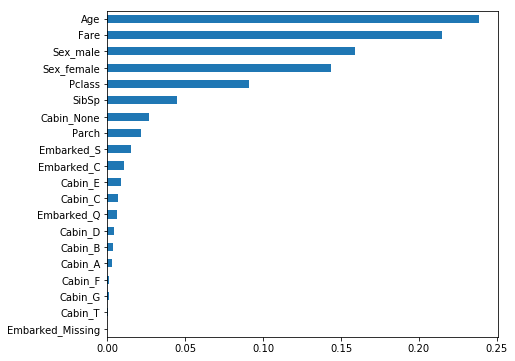

In [104]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending=True, inplace = True)
feature_importances.plot(kind = "barh", figsize = (7, 6))

As we can observe above, the five variables that contributed the most to survive were: 'Sex_female', 'Sex_male', 'Fare', 'Age' and 'Pclass'.

Now we are going to compare the number of jobs to run in parallel for both fit and predict. None means 1 and -1 means using all processors.

In [105]:
%%timeit
model = RandomForestRegressor(1000, oob_score = True, n_jobs = 1, random_state = 42)
model.fit(X, y)

1.32 s ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
model = RandomForestRegressor(1000, oob_score = True, n_jobs = -1, random_state = 42)
model.fit(X, y)

1.09 s ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


After training our model we can observe that when n_jobs is -1 it gives us the best results.

The next thing that comes is one of the most important of this tutorial. We are looking for the highest possible accuracy and firstly we should know what is the amount of trees that fits better and gives us the highest accuracy. 

30 trees
C-stat:  0.8538704076524037

50 trees
C-stat:  0.8606983457429244

100 trees
C-stat:  0.8635211282608464

200 trees
C-stat:  0.8621629970493935

500 trees
C-stat:  0.863739494455629

1000 trees
C-stat:  0.864053728735926

2000 trees
C-stat:  0.8634439011919599



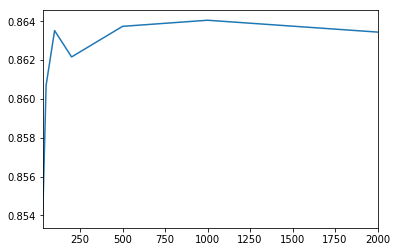

In [106]:
results = []

n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score = True, n_jobs = -1, random_state = 42)
    model.fit(X, y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

As we can observe above in the plot, the amount of trees that have had the best accuracy is 1000. 

Here we are also looking for an improvement on our model, but this time we are going to focus on the best Feature Transformation on Input data looking for an improvement on the previous accuracy.

auto option
C-stat:  0.8635211282608464

None option
C-stat:  0.8635211282608464

sqrt option
C-stat:  0.8617741987025852

log2 option
C-stat:  0.8617741987025852

0.9 option
C-stat:  0.861792839719213

0.2 option
C-stat:  0.8617741987025852



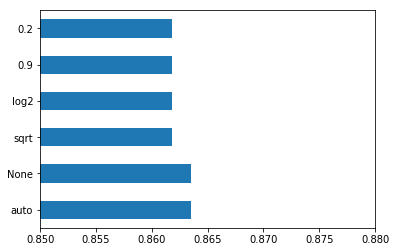

In [107]:
results = []
max_features_options = ["auto", None, "sqrt", "log2" , 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42, max_features = max_features)
    model.fit(X, y)
    print(max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot(kind = "barh", xlim = (.85, .88));

As we can contemplate in the graph, the 'auto' option is the one that fits the best.


Finally, the last step we need to do for getting the perfect Random Forest algorithm, is finding out which min_samples_leaf_options can increase even more the accuracy of our past model.

1 min samples
C-stat:  0.864053728735926

2 min samples
C-stat:  0.8696433707218867

3 min samples
C-stat:  0.8715713844416749

4 min samples
C-stat:  0.87347809414246

5 min samples
C-stat:  0.8742636798432022

6 min samples
C-stat:  0.8740293356341673

7 min samples
C-stat:  0.8732890209738068

8 min samples
C-stat:  0.8718616517005933

9 min samples
C-stat:  0.8692785393964572

10 min samples
C-stat:  0.86742508974318



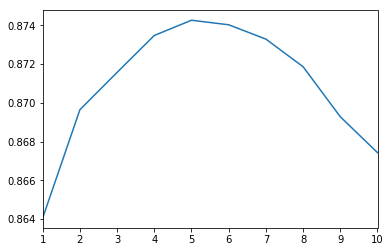

In [108]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators = 1000,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state = 42,
                                  max_features = "auto",
                                  min_samples_leaf = min_samples
                                  )
    model.fit(X, y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")

pd.Series(results, min_samples_leaf_options).plot();

When min samples leaf is 5 the performance of the model is the highest.

In [109]:
model = RandomForestRegressor(n_estimators = 1000,
                              oob_score = True,
                              random_state = 42,
                              max_features = "auto",
                              min_samples_leaf = 5
                              )
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: ", roc)

C-stat:  0.8742636798432022


## Conclusion
Our model finally scored 0.87426. Not that bad!

We believe that it is not that easy to improve the score we achieved. However, we’d like to try to improve it’s accuracy in the near future.

Again, feedback is highly appreciated and ideas in how to improve the model too.